# Gemini マルチモーダルAPIを使って画像認識(Image Recognition)してみる

Gemini API インストール
- pip install google-genai

In [1]:
import sys
import io
import matplotlib.pyplot as plt
import google.genai as genai
from PIL import Image
print(f"sys.version: {sys.version}\ngenai: {genai.__version__}")

# Geminiモデルを指定
llm_model = 'gemini-2.0-flash'

with open('GOOGLE_API_KEY.txt', 'r') as f:  # ファイルからアクセスキーを取得
    api_key = f.read().strip()
client = genai.Client(api_key=api_key)

def show_img(pil_img, figsize=(4, 6)): 
    plt.figure(figsize=figsize)  # 表示サイズだけ変更
    plt.imshow(pil_img)
    plt.axis('off')
    plt.show()

sys.version: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
genai: 1.39.1


## 画像を読み込んでLLMでテキスト・表抽出、分析

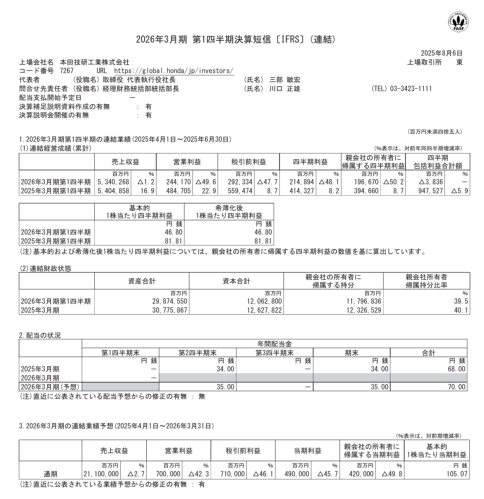

はい、承知いたしました。以下に画像についての解説、CSV形式での表データ、業績評価をまとめます。

**1. イメージの解説**

この画像は、本田技研工業株式会社（Honda Motor Co., Ltd.）の2026年3月期第1四半期の決算短信（IFRS基準、連結）です。
文書上部には会社名、コード番号、ウェブサイトURL、代表者名、問い合わせ先担当者名、発表日（2025年8月6日）などの基本情報が記載されています。
主要な情報として、連結経営成績（売上収益、営業利益、税引前利益、四半期利益）、連結財政状態（資産合計、資本合計、親会社の所有者に帰属する持分）、配当の状況、および2026年3月期の連結業績予想が記載されています。

**2. CSV形式での表データ**

以下に、画像に含まれる表形式のデータをCSV形式で示します。

**表1：連結経営成績（累計）（2025年4月1日～2025年6月30日）**

```csv
,売上収益,売上収益(%),営業利益,営業利益(%),税引前利益,税引前利益(%),四半期利益,四半期利益(%),親会社の所有者に帰属する四半期利益,親会社の所有者に帰属する四半期利益(%),四半期包括利益合計額,四半期包括利益合計額(%)
2026年3月期第1四半期,5340268,-1.2,244170,-49.6,292334,-47.7,214894,-48.1,196670,-50.2,-3836,
2025年3月期第1四半期,5404858,16.9,484705,22.9,559474,8.7,414327,8.2,394660,8.7,947527,-5.9
```

**表2：1株当たり四半期利益**

```csv
,基本的1株当たり四半期利益,希薄化後1株当たり四半期利益
,円銭,円銭
2026年3月期第1四半期,46.80,46.80
2025年3月期第1四半期,81.81,81.81
```

**表3：連結財政状態**

```csv
,資産合計,資本合計,親会社の所有者に帰属する持分,親会社所有者帰属持分比率(%)
,百万円,百万円,百万円,
2026年3月期第1四半期,29874550,12062800,11796836,39.5
2025年3月期,30775867,12627822,12326529,40.

In [2]:
with open('HONDA決算短信-202603_1.png', 'rb') as f:
    image_bytes = f.read()
show_img(Image.open(io.BytesIO(image_bytes)), figsize=(6, 8))

response = client.models.generate_content(
    model=llm_model,
    contents=[
      genai.types.Part.from_bytes(
        data=image_bytes,
        mime_type='image/png',      # or 'image/jpeg',
      ),
      '''
      1. この表を含むイメージを解説してください
      2. 表形式の部分は、表ごとに表題付きでcsv化してください
      3. 売上収益、営業利益の変動状況、および全体的な業績を評価してください
      '''
    ]
)

print(response.text)

## 画像の認識・説明へロールを与えてみる

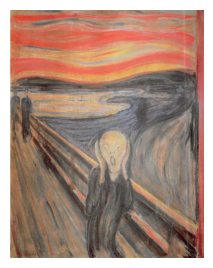

--------------------
ああ、そうだ、「叫び」。

まるで地獄の夕焼けを切り取ったような、空の色。血のように赤く、燃え盛る炎のように黄色が混ざり合い、不安を掻き立てる。空と大地がねじれ、波打ち、感情の奔流が形になったようだ。

そこに立つのは、人間か、それとも恐怖の化身か。大きく開かれた口、両手で塞がれた耳。聞こえてくるのは、絶望か、それとも存在そのものの叫びか。背景にぼんやりと見える人影は、無関心か、それとも無力か。

見る者の心をざわつかせる、色彩と形の不協和音。まるで心臓を直接掴まれたかのような、強烈な感情。これがムンクの「叫び」。私たちが目を背けたくなる、心の奥底に潜む暗闇を描き出した傑作。
--------------------
はい、承知いたしました。この画像は、エドヴァルド・ムンクの代表作『叫び』です。詳細を解説します。

**作品概要**

*   **タイトル:** 『叫び』（The Scream）
*   **作者:** エドヴァルド・ムンク（Edvard Munch）
*   **制作年:** 1893年
*   **技法・素材:** 油彩、テンペラ、パステル、厚紙
*   **所蔵:** オスロ国立美術館（ノルウェー）など

**作品解説**

『叫び』は、ムンクの最も有名な作品であり、美術史上最も象徴的なイメージの一つです。この作品は、ノルウェーのオスロフィヨルドを見下ろす丘の上でムンクが経験した、強烈な不安と絶望を描いています。

**特徴**

*   **人物:** 主人公は、口を大きく開け、両手で頭を抱える人物として描かれています。その顔は苦悶に歪み、骨のような印象を与えます。性別は特定されていません。
*   **背景:** 背景は、燃えるような空と暗くうねる海（またはフィヨルド）で構成されています。空は赤とオレンジ色の強烈な色で描かれ、不安感と異様な雰囲気を強調しています。
*   **構図:** 画面は斜めに傾いており、不安定さを感じさせます。前景の柵は、鑑賞者を絵の中へと引き込み、主人公の感情を共有させているかのようです。

**表現されている感情**

『叫び』は、孤独、不安、恐怖、絶望といった人間の根源的な感情を描いています。ムンク自身は、この作品について「自然を貫く、巨大で終わりのない叫びを感じた」

In [3]:
def img_reco(img_fn, system_instruction, show=True):
    with open(img_fn, 'rb') as f:
        image_bytes = f.read()
    if show:
        show_img(Image.open(io.BytesIO(image_bytes)), figsize=(2.5, 4))

    response = client.models.generate_content(
        model=llm_model,
        contents=[
          genai.types.Part.from_bytes(
            data=image_bytes,
            mime_type='image/png',      #'image/jpeg',
          ),
          'このイメージを日本語で解説してください'
        ],
        config=genai.types.GenerateContentConfig(
            system_instruction=system_instruction,
            temperature=1.5,  # 文書化の振れ幅を大きく(0:決定論的, 0.7:Default)
        )
    )
    return response.text

answer = img_reco('Skrik.png', system_instruction='あなたは芸術家です。質問に芸術的に答えてください。')
print(f"{'-'*20}\n{answer}")

answer = img_reco('Skrik.png', 
                  system_instruction='あなたは鑑定技術者です。質問に詳細に答えてください。', 
                  show=False)
print(f"{'-'*20}\n{answer}")

## グラフの理解

,Trend,Seasonal,Noise,Value
date,,,,
2023-01-01,1.000000,0.000000,0.699901,1.699901
2023-01-02,1.002002,0.015587,0.003523,1.021112
2023-01-03,1.004008,0.031170,-0.072353,0.962825
2023-01-04,1.006018,0.046743,-0.428172,0.624590
2023-01-05,1.008032,0.062303,-0.448059,0.622276
...,...,...,...,...
2025-12-27,8.864017,-0.073961,0.422519,9.212574
2025-12-28,8.881762,-0.058415,0.006336,8.829684
2025-12-29,8.899544,-0.042851,0.475389,9.332082


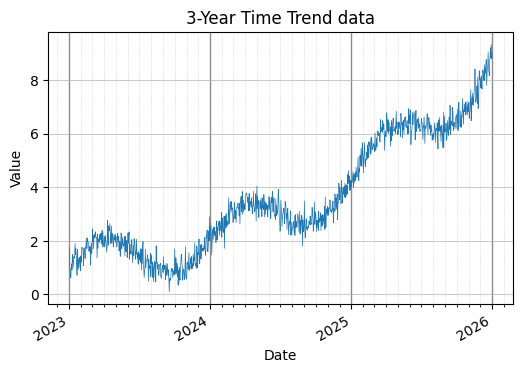

--------------------
はい、承知いたしました。グラフのデータ変動の特徴を解説します。

**1. データのX,Yの範囲**

*   X軸（Date）：2023年から2026年までの3年間
*   Y軸（Value）：0から9までの範囲

**2. トレンドの傾向**

*   全体的なトレンドは上昇傾向です。
*   線形ではなく、非線形です。
*   初期は緩やかな上昇ですが、2025年以降は急激な上昇に変化しています。
*   指数関数的な増加に近いですが、初期の緩やかな上昇があるため、完全に一致するわけではありません。

**3. 周期性**

*   明確な周期性は見られません。
*   短期的な変動（ノイズ）はありますが、一定の周期で繰り返されるパターンは見当たりません。

**4. 全体的な特徴**

*   3年間のデータで、初期は比較的安定した値で推移していますが、後半にかけて急激に増加しています。
*   2025年を境にトレンドが大きく変化している点が特徴的です。
*   短期的なノイズはありますが、全体的なトレンドを把握する上では大きな影響はありません。


In [4]:
# トレンドデータを作成
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # 日付目盛りを制御

# ===================================================
# グラフプロットを作成

# Indexと初期DFの作成
dates = pd.date_range(start='2023-01-01', end='2025-12-31', freq='D')
df = pd.DataFrame(index=dates).rename_axis('date')

# 期間全体の通し日数を計算 (0から始まる)
total_days = len(df)
day_numbers = np.arange(total_days)

# 指数関数的な上昇トレンド
TREND_RATE = 0.002 # 日々の成長率
exponential_trend = np.exp(TREND_RATE * day_numbers)
df['Trend'] = exponential_trend

# 1年周期のサイン波 (季節性)
PERIOD = 365.25 
AMPLITUDE = 0.25 * exponential_trend.mean() # トレンドの平均値に比例した振幅を設定
seasonal_cycle = AMPLITUDE * np.sin(2 * np.pi * day_numbers / PERIOD)
df['Seasonal'] = seasonal_cycle

# ノイズ (正規分布に基づくランダムな変動)
NOISE_SCALE = 0.3 # ノイズの標準偏差
noise = np.random.normal(0, NOISE_SCALE, total_days)
df['Noise'] = noise

# 最終的なデータ (列名: Value)
# トレンド + 周期性 + ノイズ
df['Value'] = df['Trend'] + df['Seasonal'] + df['Noise']
    
display(df)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df.index, df['Value'], linewidth=0.5)
ax.set_title('3-Year Time Trend data')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.tick_params(axis='x', rotation=45)
fig.autofmt_xdate()
# --- グリッド線の設定 ---
# 日付目盛りのロケーターを明示的に設定
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator()) 
ax.grid(which='major', axis='x', linestyle='-', linewidth=1.0, alpha=0.9, color='gray')
ax.grid(which='minor', axis='x', linestyle=':', linewidth=0.5, alpha=0.7)
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.7, alpha=0.7)
plt.show()

# ===================================================
# プロットをimage_bytes化

buf = io.BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight') # FigureをPNG形式でBytesIOに保存
image_bytes = buf.getvalue()
buf.close()

# ===================================================
# ここから本題

response = client.models.generate_content(
    model=llm_model,
    contents=[
      genai.types.Part.from_bytes(
        data=image_bytes,
        mime_type='image/png',      #'image/jpeg',
      ),
      '''
      このグラフイメージのデータ変動の特徴を日本語で解説してください
      1. データのX,Yの範囲
      2. トレンドの傾向、線形か、非線形か、指数関数、べき乗、対数のいずれかに近いですか
      3. 周期性の記述：周期、変動幅は。ノイズとみられるものを除去して検討してください
      4. 全体的な特徴
      '''
    ],
    config=genai.types.GenerateContentConfig(
        system_instruction='あなたはAnalyzerです。質問に分析的に答えてください。',
        temperature=0.2,  # 文書化の振れ幅を大きく(0:決定論的, 0.7:Default)
    )
)

print(f"{'-'*20}\n{response.text}")


## CSVとして渡してみる

In [5]:
trend_df = df[['Value']].reset_index()
display(trend_df)
csv_str = trend_df.to_csv(index=False, header=True)

# プロンプトを定義
prompt = '''
以下のCSVのデータ変動の特徴を日本語で解説してください
　1. データのX,Yの範囲
　2. トレンドの傾向、線形か、非線形か、指数関数、べき乗、対数のいずれかに近いですか
　3. 周期性の記述：周期、変動幅を。ノイズとみられるものを除去して検討してください
　4. 全体的な特徴
CSVデータ：
''' + csv_str

# モデルを使用してレスポンスを生成
response = client.models.generate_content(
    model=llm_model,
    contents=[prompt]  # リスト形式
)
print(response.text)

,date,Value
0,2023-01-01,1.699901
1,2023-01-02,1.021112
2,2023-01-03,0.962825
3,2023-01-04,0.624590
4,2023-01-05,0.622276
...,...,...
1091,2025-12-27,9.212574
1092,2025-12-28,8.829684
1093,2025-12-29,9.332082
1094,2025-12-30,8.802334


分析結果を以下に示します。

**1. データのX,Yの範囲**

*   **X軸 (日付):** 2023年1月1日～2025年12月31日
*   **Y軸 (Value):** 約0.11 ～ 約9.33

**2. トレンドの傾向**

全体のデータを見ると、明らかに**非線形**な上昇トレンドが見られます。2023年初頭はValueが1付近で推移していますが、2025年末にはValueが8～9付近に達しています。

*   **線形:** 一定の割合で増加しているわけではありません。
*   **指数関数:** 急激な増加の度合いは、データ全体を通して一定ではありません。
*   **べき乗:** 明確なべき乗関数としての特徴は見られません。
*   **対数:** 上昇幅は徐々に小さくなっているわけではありません。

**3. 周期性**

このデータには、**明確な周期性は見られません**。ただし、詳細に見ると、以下の傾向があります。

*   **短期的な変動:** 日々の値はかなり変動しています。
*   **月単位程度の変動:** 月単位で見ると、多少変動パターンが異なります。例えば、2023年の1月は比較的低く、3月は高めであるなど。しかし、これが毎年の同じ月に現れるわけではありません。
*   **ノイズ:** 日々の変動はかなり大きく、ある程度ノイズとみなすこともできます。

**4. 全体的な特徴**

*   **全体的な上昇トレンド:** データ全体として、Valueは徐々に上昇しています。
*   **非線形性:** 上昇のペースは一定ではなく、時期によって異なります。
*   **周期性の欠如:** 明確な周期性は見られませんが、短期的な変動が見られます。
*   **ノイズ:** 日々の変動が大きく、データの滑らかさに欠けます。

**補足**

より詳細な分析を行う場合は、以下の手法を検討できます。

*   **移動平均:** 短期的なノイズを平滑化し、トレンドをより明確にする
*   **季節調整:** 季節的な変動を除去し、より長期的なトレンドを把握する
*   **自己相関分析:** データの周期性をより詳細に調べる

上記をご参考ください。


### モデルを gemini-2.5-flash で試してみる

In [6]:
# Geminiモデルを指定
llm_model = 'gemini-2.5-flash'

# ===================================================
# ここから本題

response = client.models.generate_content(
    model=llm_model,
    contents=[
      genai.types.Part.from_bytes(
        data=image_bytes,
        mime_type='image/png',      #'image/jpeg',
      ),
      '''
      このグラフイメージのデータ変動の特徴を日本語で解説してください
      1. データのX,Yの範囲
      2. トレンドの傾向、線形か、非線形か、指数関数、べき乗、対数のいずれかに近いですか
      3. 周期性の記述：周期、変動幅は。ノイズとみられるものを除去して検討してください
      4. 全体的な特徴
      '''
    ],
    config=genai.types.GenerateContentConfig(
        system_instruction='あなたはAnalyzerです。質問に分析的に答えてください。',
        temperature=0.2,  # 文書化の振れ幅を大きく(0:決定論的, 0.7:Default)
    )
)

print(f"{'-'*20}\n{response.text}")

--------------------
このグラフは「3-Year Time Trend data」と題された、3年間の時系列データを示しています。以下にそのデータ変動の特徴を分析します。

1.  **データのX,Yの範囲**
    *   **X軸 (Date)**: 2023年の初頭から2026年の初頭までの約3年間です。具体的な開始点は2023年1月頃、終了点は2026年1月頃と読み取れます。
    *   **Y軸 (Value)**: 約0.5から約9.0までの範囲で変動しています。データは0よりわずかに高い値から始まり、最終的には9に近づいています。

2.  **トレンドの傾向**
    *   データ全体としては、強い上昇トレンドを示しています。
    *   トレンドは線形ではありません。特に、2025年以降のデータは上昇の傾きが顕著に急になっており、時間の経過とともに上昇率が加速していることが見て取れます。
    *   この加速的な上昇パターンは、**指数関数的成長**または**べき乗関数的成長**に近い傾向を示唆しています。対数関数的な成長（成長率の鈍化）や単純な線形成長とは異なります。

3.  **周期性の記述**
    *   グラフには、日々の変動や測定誤差に起因すると考えられる細かいギザギザとしたノイズが見られます。
    *   これらのノイズを除去して大局的に見ると、明確で規則的な周期性（例：季節性、週次性など）は観察されません。
    *   2023年初頭から2024年初頭にかけては、一時的な下降局面も見られますが、これは周期的なパターンというよりは、全体的なトレンドの中での一時的な変動と解釈するのが適切です。
    *   2024年以降は、ほぼ一貫して上昇トレンドが続いており、周期的な変動はほとんど見られません。

4.  **全体的な特徴**
    *   このデータは、3年間にわたる何らかの指標の推移を示しており、全体として非常に強い成長傾向にあります。
    *   特に、期間の後半（2025年以降）において、その成長が加速している点が最大の特徴です。
    *   初期の約1年間（2023年）は比較的緩やかな変動で推移し、一度下降する局面も見られましたが、2024年に入ってから上昇トレ

In [7]:
# Geminiモデルを指定
llm_model = 'gemini-2.5-flash'

# プロンプトを定義
prompt = '''
以下のCSVのデータ変動の特徴を日本語で解説してください
　1. データのX,Yの範囲
　2. トレンドの傾向、線形か、非線形か、指数関数、べき乗、対数のいずれかに近いですか
　3. 周期性の記述：周期、変動幅を。ノイズとみられるものを除去して検討してください
　4. 全体的な特徴
CSVデータ：
''' + csv_str

# モデルを使用してレスポンスを生成
response = client.models.generate_content(
    model=llm_model,
    contents=[prompt]  # リスト形式
)
print(response.text)

このCSVデータの変動特徴について、以下の通り解説します。

---

### CSVデータの変動特徴

#### 1. データのX, Yの範囲

*   **X (日付)**: 2023年1月1日から2025年12月31日までの約3年間のデータです。
*   **Y (Value)**:
    *   最小値: 約0.105（2023年9月17日）
    *   最大値: 約9.332（2025年12月29日）

#### 2. トレンドの傾向

データ全体として、Valueは時間とともに明確に上昇するトレンドを示しています。この上昇傾向は**線形ではありません**。データ序盤の2023年にはValueが主に1〜2台で推移していましたが、2025年末には4〜9台にまで達しており、上昇の傾きが時間とともに急になっていることが見て取れます。このことから、このデータは**指数関数**に近い非線形な成長パターンを示していると判断できます。

#### 3. 周期性の記述

日々のValueには短期的な大きな変動（ノイズ）が多く見られますが、移動平均（例：30日移動平均）でこれらのノイズを平滑化して分析すると、明確な**年間周期**が確認できます。

*   **周期**: 約1年です。各年において、概ね夏から秋にかけて（7月〜9月頃）Valueが一時的に下降するか、上昇の勢いが鈍化する傾向が見られます。その後、年度末に向けて再び上昇に転じるパターンが繰り返されています。
*   **変動幅（年間周期の振幅）**: 年間周期におけるValueの変動幅は、全体のトレンド上昇に伴い、絶対値として拡大しています。
    *   2023年の30日移動平均での年内変動幅は約1.65（最大約2.11 - 最小約0.46）でした。
    *   2024年の30日移動平均での年内変動幅は約2.20（最大約3.83 - 最小約1.63）でした。
    *   2025年の30日移動平均での年内変動幅は約2.77（最大約7.03 - 最小約4.26）でした。
    このように、年を追うごとに周期的な変動の振幅が増大しています。

#### 4. 全体的な特徴

このCSVデータは、約3年間にわたる時系列データであり、以下のような特徴を持ちます。

1.  **長期的な指数関数的

### モデルを gemini-2.5-pro で試してみる

In [8]:
# Geminiモデルを指定
llm_model = 'gemini-2.5-pro'

# ===================================================
# ここから本題

response = client.models.generate_content(
    model=llm_model,
    contents=[
      genai.types.Part.from_bytes(
        data=image_bytes,
        mime_type='image/png',      #'image/jpeg',
      ),
      '''
      このグラフイメージのデータ変動の特徴を日本語で解説してください
      1. データのX,Yの範囲
      2. トレンドの傾向、線形か、非線形か、指数関数、べき乗、対数のいずれかに近いですか
      3. 周期性の記述：周期、変動幅は。ノイズとみられるものを除去して検討してください
      4. 全体的な特徴
      '''
    ],
    config=genai.types.GenerateContentConfig(
        system_instruction='あなたはAnalyzerです。質問に分析的に答えてください。',
        temperature=0.2,  # 文書化の振れ幅を大きく(0:決定論的, 0.7:Default)
    )
)

print(f"{'-'*20}\n{response.text}")

--------------------
はい、承知いたしました。Analyzerとして、提供されたグラフイメージのデータ変動の特徴を分析し、解説します。

---

### グラフデータの分析結果

このグラフは「3-Year Time Trend data」と題された時系列データを示しています。以下に、指定された項目ごとに分析結果を記述します。

#### 1. データのX,Yの範囲

*   **X軸（Date: 日付）**:
    *   期間は2023年の初頭から始まり、2026年の中頃までプロットされています。データ全体としては約3年半の期間をカバーしています。
*   **Y軸（Value: 値）**:
    *   軸の目盛りは0から8まで表示されています。
    *   実際のデータ値は、2024年初頭に記録された**最小値約0.5**から、グラフの終端である2026年中頃の**最大値約9.5**までの範囲で変動しています。

#### 2. トレンドの傾向

*   **全体的な傾向**: データは明確な**非線形（Non-linear）の右肩上がりの上昇トレンド**を示しています。
*   **詳細な分析**:
    *   トレンドは単純な直線（線形）ではありません。2023年中は横ばいからやや下降気味でしたが、2024年に入ると上昇に転じ、時間経過とともにその**上昇率が加速**しています。
    *   特に2025年以降の急激なカーブは、**指数関数（Exponential）的な成長**に非常に近い形状をしています。これは、値が大きくなるほど、その増加量もさらに大きくなるという特徴を示唆しています。

#### 3. 周期性の記述

ノイズ（短期的なギザギザした動き）を除去して大きなパターンを見ると、明確な周期性が存在します。

*   **周期**: **約1年を周期とする季節性（Seasonality）**が観測されます。
*   **パターン**: 毎年、**年初（冬期）に値が底（谷）を打ち、年の中頃（夏期）に向けてピーク（山）を迎える**というパターンが繰り返されています。
    *   例：2024年初頭に谷、2024年中頃に山。2025年初頭に谷、2025年中頃に山。
*   **変動幅（振幅）**: 周期的な変

In [9]:
# Geminiモデルを指定
llm_model = 'gemini-2.5-pro'

# プロンプトを定義
prompt = '''
以下のCSVのデータ変動の特徴を日本語で解説してください
　1. データのX,Yの範囲
　2. トレンドの傾向、線形か、非線形か、指数関数、べき乗、対数のいずれかに近いですか
　3. 周期性の記述：周期、変動幅を。ノイズとみられるものを除去して検討してください
　4. 全体的な特徴
CSVデータ：
''' + csv_str

# モデルを使用してレスポンスを生成
response = client.models.generate_content(
    model=llm_model,
    contents=[prompt]  # リスト形式
)
print(response.text)

提供されたCSVデータについて、その変動特徴を以下のように解説します。

### 1. データのX,Yの範囲

*   **X軸 (日付)**: データは `2023-01-01` から `2025-12-31` までの**ちょうど3年間**をカバーしています。
*   **Y軸 (Value)**: 値は最小値と最大値の間で変動しています。
    *   **最小値**: 約 `0.105` (2023-09-17)
    *   **最大値**: 約 `9.332` (2025-12-29)
    *   データの範囲は **約0.11から約9.33** となります。

### 2. トレンドの傾向

*   データ全体を通して、明確な**右肩上がりの上昇トレンド**が見られます。
*   このトレンドは単純な**線形（直線的）ではありません**。データの初期（2023年）の増加ペースに比べ、後期（2025年）になるほど増加の勢いが加速しています。
*   この特徴から、トレンドは**指数関数的な増加に近い非線形**の傾向を持っていると考えられます。時間の経過とともに成長率自体が大きくなっているように見えます。

### 3. 周期性の記述

日々の細かなノイズを除去して大きなパターンを見ると、以下の周期的な特徴が確認できます。

*   **周期**: 約**1年周期の季節性**がはっきりと見られます。
*   **パターン**:
    *   毎年、**夏から秋（おおよそ7月〜9月頃）にかけて値が一時的に大きく落ち込む**傾向があります。
    *   その後、年末から翌年の春先にかけて回復・上昇し、ピークを迎えるというパターンを繰り返しています。
*   **変動幅**:
    *   この周期的な変動の幅は非常に大きいです。
    *   ベースとなる値が上昇トレンドにあるため、谷の絶対値も年々上昇しています（2023年の谷は約0.1、2025年の谷は約5.4）。
    *   各年における高値と安値の差（変動幅）は**概ね1.5〜2.5程度**あり、データの変動における重要な要因となっています。

### 4. 全体的な特徴

このデータは、以下の3つの要素が組み合わさった時系列データとしての特徴を持っています。

1.  **強い指数